# Project 1
### Peter Goodridge

## Overview

We will be using a public dataset of digital music rated on Amazon.  The data contains song ratings, on a 5 star scale, along with the user who created the rating and the song being rated.

The simple model we will build will predict the rating a user could be expected to hold for a given song.  Our model will only use average ratings by song and user to form this prediction.  This could be used to construct playlists of songs the user should find enjoyable.  More likely this model could provide a baseline against which a more complex model can be evaluated against.

## Initialize and Load Data

In [12]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [13]:
music = (pd.read_csv('https://raw.githubusercontent.com/TheFedExpress/DATA612/master/Project1/ratings_Digital_Music.csv', 
                     header = None, names = ['user', 'item', 'rating', 'timestamp'])
    .drop('timestamp', axis = 1)
  )

## Create Dense Matrix

Our music dataset is very sparse so we will find as dense of a subset as possible.  We accomplish this by first finding the most frequently appearing users and items.  We then run a 30 by 30 matrix from left to right and top to bottom accross this smaller user-item matrix.  To visualize this, think of the way a Conv Net slides the kernel accross an image.

In [14]:
user_counts = music.groupby('user').count()['item']
item_counts = music.groupby('item').count()['user']

music_subset = (music.set_index('user')
    .loc[user_counts >= 150]
    .reset_index()
    .set_index('item')
    .loc[item_counts >= 100]
    .reset_index()
    .pivot(index = 'user', columns = 'item', values = 'rating')
    )

counts = []
shape = 30
stride = 1
for col in range(0, len(music_subset.columns) - shape, stride):
    for row in range (0, len(music_subset) - shape, stride):
        subset = music_subset.iloc[row:row+shape, col:col+shape]
        hits = sum(subset.count())            
        counts.append([row,col, hits])
    
best_row = (pd.DataFrame(counts, columns = ['row', 'col', 'n'])    
    .sort_values('n', ascending = False)
    .head(1)
    )
row_index = best_row.iloc[0,0]
col_index = best_row.iloc[0,1]
my_subset = music_subset.iloc[row_index:row_index+30, col_index:col_index+30]  
my_subset

item,B000AL730O,B000AOENCM,B000AU1NZQ,B000AY9OGW,B000B5IPLK,B000B5QWNI,B000B5XSXU,B000BGR0OM,B000BGR18W,B000BJS4P8,...,B000EGDNCW,B000EMGAGW,B000EMGAOY,B000EU1KRS,B000EXZ9P4,B000FII324,B000FMR4T8,B000FPYNQW,B000FUF86Q,B000FVQYYK
user,,,,,,,,,,,,,,,,,,,,,
A14GK0E64J0WAS,3.0,3.0,NaN,NaN,NaN,5.0,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,4.0,NaN,4.0
A1AL15PY5AVFNX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN
A1D2C0WDCSHUWZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,4.0,5.0
A1EX5SK2PD0XLC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A1GN8UJIZLCA59,4.0,4.0,4.0,NaN,4.0,NaN,4.0,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A1IKOYZVFHO1XP,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A1J5KCZC8CMW9I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A1QEWOSV05RYEO,4.0,4.0,NaN,4.0,4.0,NaN,NaN,NaN,4.0,NaN,...,NaN,NaN,4.0,4.0,NaN,4.0,4.0,4.0,NaN,NaN
A1W16J9R4DOBEC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Create Training Data

Next we'll divide our data into train and test sets.  These sets will each consist of only non-null values of rating so 
this will be made easist by creating transposing into a long version of the dataset.

The first sub-step will be finding the overall average.

In [15]:
long_df = (my_subset.reset_index()
    .melt(id_vars = 'user')
    )

train, test = train_test_split(long_df.dropna(), test_size = .3, random_state = 7)
train['is_train'] = 1
test['is_test'] = 1

full_df = long_df.join(train.is_train).join(test.is_test)


def calc_bias(df, column):
    df = df.copy()
    df[column + '_bias'] = df.value - df.rating_avg
    return df

train_final = full_df.loc[full_df.is_train == 1]
avg_rating = train_final.value.mean()
print('Avg Rating: {:.2f}'.format(avg_rating))


Avg Rating: 4.05


We then find the item and user biases

In [16]:
train_final['rating_avg'] = avg_rating

train_user = train_final.groupby('user').mean().pipe(calc_bias, 'user')
train_item = train_final.groupby('item').mean().pipe(calc_bias, 'item')


train_final = (train_final.join(train_item.item_bias, on = 'item')
    .join(train_user.user_bias, on = 'user')
)

train_final.loc[train_final.item ==  'B000AL730O']

,user,item,value,is_train,is_test,rating_avg,item_bias,user_bias
0,A14GK0E64J0WAS,B000AL730O,3.0,1.0,NaN,4.053333,-0.19619,-0.178333
4,A1GN8UJIZLCA59,B000AL730O,4.0,1.0,NaN,4.053333,-0.19619,0.089524
7,A1QEWOSV05RYEO,B000AL730O,4.0,1.0,NaN,4.053333,-0.19619,0.030000
9,A200C7YQJ45LRR,B000AL730O,4.0,1.0,NaN,4.053333,-0.19619,-0.608889
20,A36EDWL4F3AASU,B000AL730O,5.0,1.0,NaN,4.053333,-0.19619,-1.720000
21,A3AL8GQ69QE7WN,B000AL730O,3.0,1.0,NaN,4.053333,-0.19619,-0.720000
25,A3KJ6JAZPH382D,B000AL730O,4.0,1.0,NaN,4.053333,-0.19619,-0.178333


Adding by hand, the total for this item adds to 27.  This leads to the correct bias, confirming that pandas is behaving as expected

## Predict on Training Set



In [17]:
def predict_val(df):
    raw_val = df.rating_avg + df.item_bias + df.user_bias
    return max(min(raw_val, 5), 0)


train_final['predicted'] = train_final.apply(lambda x: predict_val(x), axis = 1)

rmse1 = ((train_final.rating_avg- train_final.value) ** 2).mean()**.5
print('Training RMSE Using Raw Avg: {:.2f}'.format(rmse1))

rmse2 = ((train_final.predicted- train_final.value) ** 2).mean()**.5
print('Training RMSE Accounting for biases: {:.2f}'.format(rmse2))

Training RMSE Using Raw Avg: 0.81
Training RMSE Accounting for biases: 0.52


## Predict on Test Set

In the test set, we won't always know both the user and item biases so we assume a bias of 0 if unknown.  This is what would happpen in the real world if there were a previously unrated song or new user, so the application is practical

In [25]:
test_final = full_df.loc[full_df.is_test == 1]

test_final['rating_avg'] = avg_rating
test_final = (test_final.join(train_item.item_bias, on = 'item')
    .join(train_user.user_bias, on = 'user')
    .fillna(0)
)

test_final['predicted'] = test_final.apply(lambda x: predict_val(x), axis = 1)

rmse3 = ((test_final.rating_avg- test_final.value) ** 2).mean()**.5
print('Test RMSE Using Raw Avg: {:.2f}'.format(rmse3))

rmse4 = ((test_final.predicted- test_final.value) ** 2).mean()**.5
print('Test RMSE Accounting for biases: {:.2f}'.format(rmse4))
test_final.pivot(index = 'user', columns = 'item', values = ['value', 'predicted']).stack()

Test RMSE Using Raw Avg: 0.84
Test RMSE Accounting for biases: 0.66


value  predicted
user           item                        
A14GK0E64J0WAS B000B5XSXU    2.0   3.821667
A1D2C0WDCSHUWZ B000FPYNQW    5.0   4.946667
               B000FUF86Q    4.0   4.946667
A1GN8UJIZLCA59 B000B5IPLK    4.0   4.589524
               B000E5N62U    4.0   4.089524
A1IKOYZVFHO1XP B000AL730O    5.0   3.857143
A1QEWOSV05RYEO B000AOENCM    4.0   3.530000
               B000AY9OGW    4.0   5.000000
               B000BK8FVA    3.0   3.030000
               B000BNTM32    5.0   4.280000
               B000BOH8XW    4.0   4.083333
               B000BR3464    5.0   4.083333
A200C7YQJ45LRR B000AOENCM    3.0   2.891111
               B000AU1NZQ    3.0   3.391111
               B000AY9OGW    3.0   4.391111
               B000B5IPLK    3.0   3.891111
               B000BOH8XW    3.0   3.444444
               B000E5N62U    3.0   3.391111
               B000E97HB2    4.0   3.391111
               B000FVQYYK    4.0   4.057778
A24N1BAS3CU27H B000BNTM32    5.0   5.000000
               B000FPYNQW    5.0   4.946667
A26NLSTT75FMJM B000AL730O    4.0   3.857143
               B000EMGAOY    4.0   4.000000
A31U2QT7SAL7K  B000BNTM32    5.0   4.196667
A3AL8GQ69QE7WN B000AOENCM    3.0   2.780000
               B000EMGAOY    4.0   3.280000
               B000EU1KRS    3.0   3.613333
               B000FII324    3.0   3.080000
A3C6ZCBUNXUT7V B000EMGAGW    4.0   3.280000
A3KJ6JAZPH382D B000FVQYYK    4.0   4.488333
A3SV72ZAHH2IDH B000BOH8XW    5.0   5.000000
               B000EMGAOY    5.0   4.946667

## Summary


In [19]:
df = pd.DataFrame.from_dict({'Set': ['Train RMSE', 'Test RMSE'], 'Simple Avg Method': [rmse1, rmse3], 'Bias Method': [rmse2, rmse4]})
df.set_index('Set')

,Simple Avg Method,Bias Method
Set,,
Train RMSE,0.814753,0.523570
Test RMSE,0.842325,0.662021


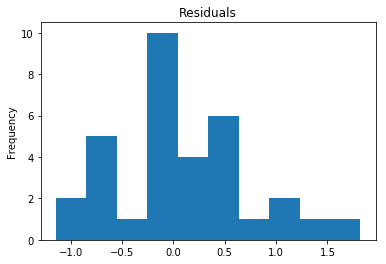

In [20]:
residuals = test_final.predicted - test_final.value
ax = residuals.plot.hist(bins=10, title = 'Residuals')

The residuals acutally somewhat resemble a normal distribution.  Given this and the improvement of the RMSE vs the "average method" indicates that using the item and user biases gives us a reasonable model of user preferences. 

As alluded to in the overview, this model should provide us a solid baseline for more complex models

In [ ]:
## Sources:

Pandorable pandas
pandas official documentation